# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

#Define additional empty lists for the later dataframe
#create lists for dataframe
city_name = []
lat = []
lng = []
max_temp = []
humidity =[]
clouds = []
wind = []
country = []
date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key + "&units=" + "metric" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        #store the city data for plotting
        city_name.append(city)
        lat.append(city_lat)
        lng.append(city_lng)
        max_temp.append(city_max_temp)
        humidity.append(city_humidity)
        clouds.append(city_clouds)
        wind.append(city_wind)
        country.append(city_country)
        date.append(city_date)  
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hirara
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | sitka
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | paamiut
Processing Record 8 of Set 1 | berbera
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | korla
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | nortelandia
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | yerbogachen
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | soyo
Processing Record 23 of Set 1 | saint-philippe
Processi

In [9]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({"City": city_name, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hirara,24.8000,125.2833,21.15,94,40,2.06,JP,1681253876
1,hermanus,-34.4187,19.2345,9.89,73,72,3.94,ZA,1681254093
2,cape town,-33.9258,18.4232,14.95,72,0,3.60,ZA,1681253924
3,rikitea,-23.1203,-134.9692,24.71,71,100,2.85,PF,1681253993
4,sitka,57.0531,-135.3300,5.70,53,9,2.48,US,1681254052


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/city_data.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/city_data.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hirara,24.8000,125.2833,21.15,94,40,2.06,JP,1681253876
1,hermanus,-34.4187,19.2345,9.89,73,72,3.94,ZA,1681254093
2,cape town,-33.9258,18.4232,14.95,72,0,3.60,ZA,1681253924
3,rikitea,-23.1203,-134.9692,24.71,71,100,2.85,PF,1681253993
4,sitka,57.0531,-135.3300,5.70,53,9,2.48,US,1681254052


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

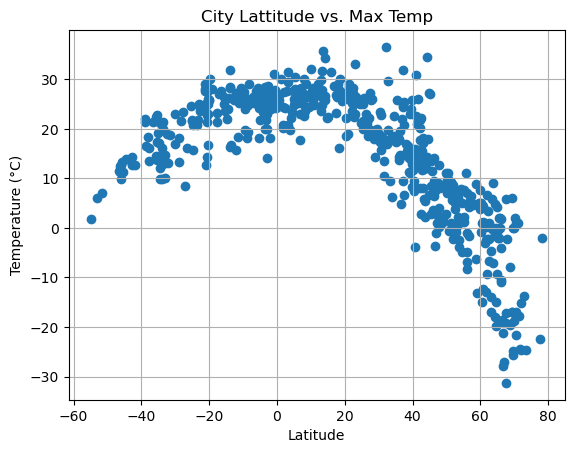

In [15]:
# Build scatter plot for latitude vs. temperature
x_values_temp = city_data_df['Lat']
y_values_temp = city_data_df['Max Temp']
plt.scatter(x_values_temp,y_values_temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')

# Incorporate the other graph properties
plt.title('City Lattitude vs. Max Temp')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png");

# Show plot
plt.show();

#### Latitude Vs. Humidity

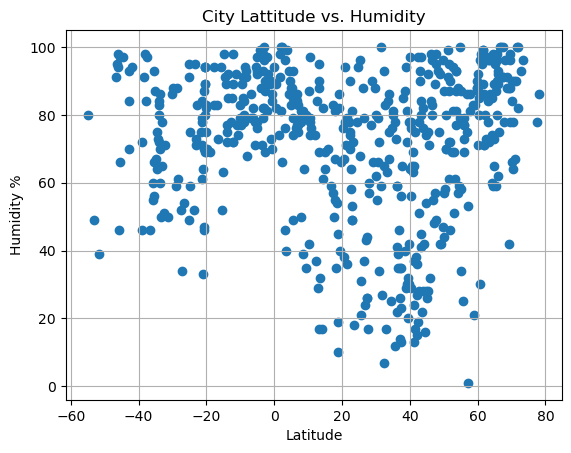

In [16]:
# Build the scatter plots for latitude vs. humidity
x_values_hum = city_data_df['Lat']
y_values_hum = city_data_df['Humidity']
plt.scatter(x_values_hum,y_values_hum)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')

# Incorporate the other graph properties
plt.title('City Lattitude vs. Humidity')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

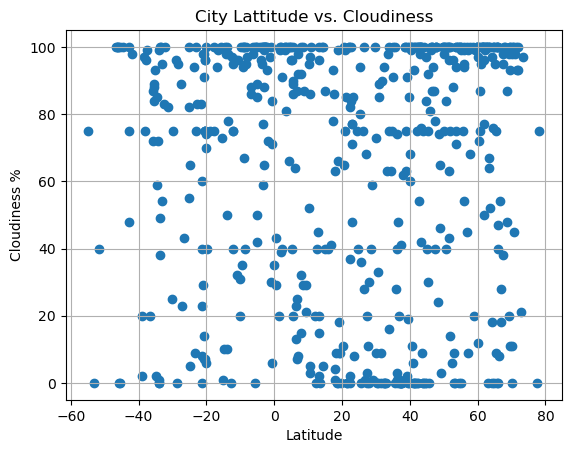

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_values_cloud = city_data_df['Lat']
y_values_cloud = city_data_df['Cloudiness']
plt.scatter(x_values_cloud,y_values_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')

# Incorporate the other graph properties
plt.title('City Lattitude vs. Cloudiness')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

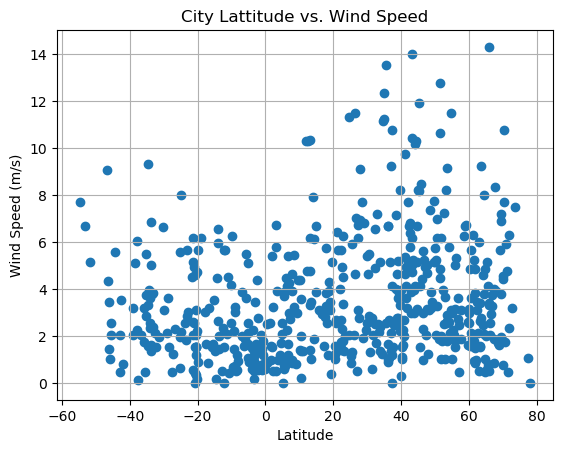

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_values_wind = city_data_df['Lat']
y_values_wind = city_data_df['Wind Speed']
plt.scatter(x_values_wind,y_values_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Incorporate the other graph properties
plt.title('City Lattitude vs. Wind Speed')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [1]:
# Define a function to create Linear Regression plots
def regress_plot(x , y):
    
    # Perform a linear regression on input values
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    
    # Get regression y-values
    regress_values = x * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)
    
    # Create Plot
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")

    # annotate the line equation
    x_loc = x.min()
    y_loc = y.max()
    plt.annotate(line_eq,(x_loc,y_loc),fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hirara,24.8000,125.2833,21.15,94,40,2.06,JP,1681253876
4,sitka,57.0531,-135.3300,5.70,53,9,2.48,US,1681254052
5,chokurdakh,70.6333,147.9167,-21.59,90,45,1.73,RU,1681254045
6,paamiut,61.9940,-49.6678,-2.21,86,96,0.83,GL,1681253877
7,berbera,10.4396,45.0143,27.67,79,5,1.99,SO,1681253877


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,9.89,73,72,3.94,ZA,1681254093
2,cape town,-33.9258,18.4232,14.95,72,0,3.60,ZA,1681253924
3,rikitea,-23.1203,-134.9692,24.71,71,100,2.85,PF,1681253993
9,vaini,-21.2000,-175.2000,29.09,79,40,6.17,TO,1681254060
13,nortelandia,-14.4547,-56.8028,24.10,91,100,0.15,BR,1681253878


###  Temperature vs. Latitude Linear Regression Plot

y = -0.6x +35.46
The r-value is: 0.7358034131582238


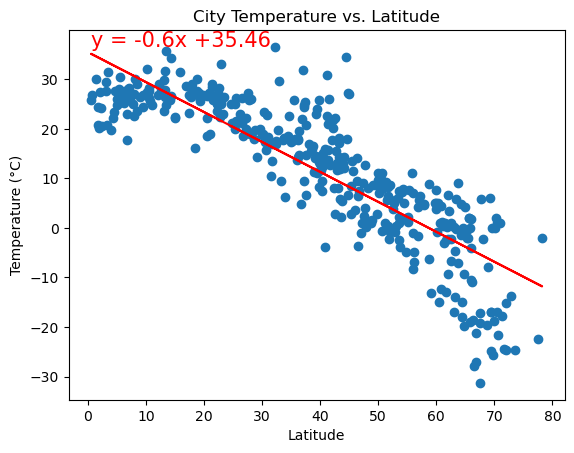

In [22]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('City Temperature vs. Latitude')

# Linear regression in Northern Hemisphere
regress_plot(northern_hemi_df['Lat'] , northern_hemi_df['Max Temp'])

y = 0.3x +27.5
The r-value is: 0.5054685904110192


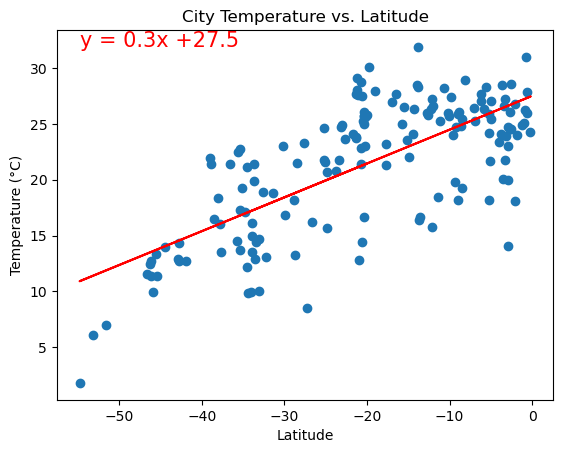

In [23]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('City Temperature vs. Latitude')
# Linear regression on Southern Hemisphere
regress_plot(southern_hemi_df['Lat'] , southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** Temperatures increase the closer you are to the equator. 

### Humidity vs. Latitude Linear Regression Plot

y = 0.2x +60.62
The r-value is: 0.030133850958030443


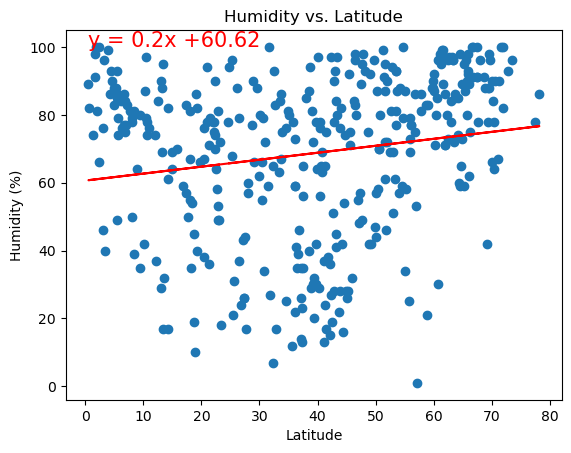

In [24]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude')

# Northern Hemisphere
regress_plot(northern_hemi_df['Lat'] , northern_hemi_df['Humidity'])

y = 0.33x +85.14
The r-value is: 0.09418334132550578


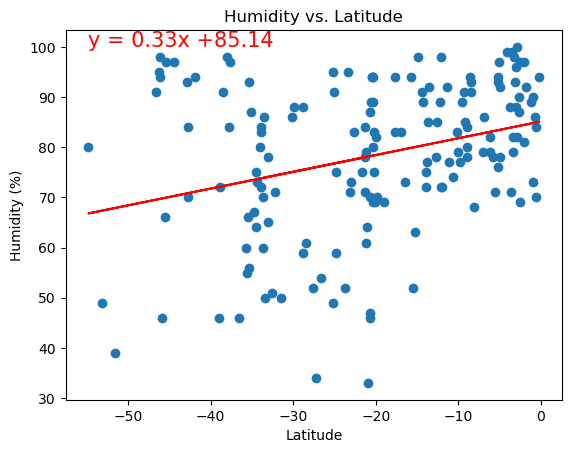

In [25]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude')
# Southern Hemisphere
regress_plot(southern_hemi_df['Lat'] , southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** Given the results of this regression line, r-squared values indicates a trendline showing humidity increasing with lattitude in both hemispheres. The r-value and results are questionable, at least for this current dataset. I would expect the northern hemisphere to have lower humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.31x +48.73
The r-value is: 0.02625583512926375


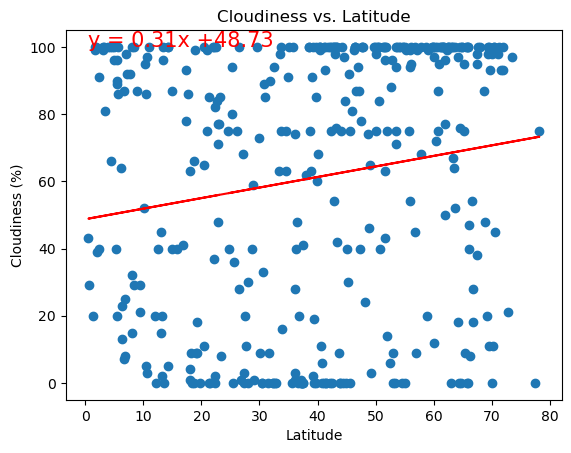

In [26]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude')

# Northern Hemisphere
regress_plot(northern_hemi_df['Lat'] , northern_hemi_df['Cloudiness'])

y = 0.41x +77.63
The r-value is: 0.027813218450286278


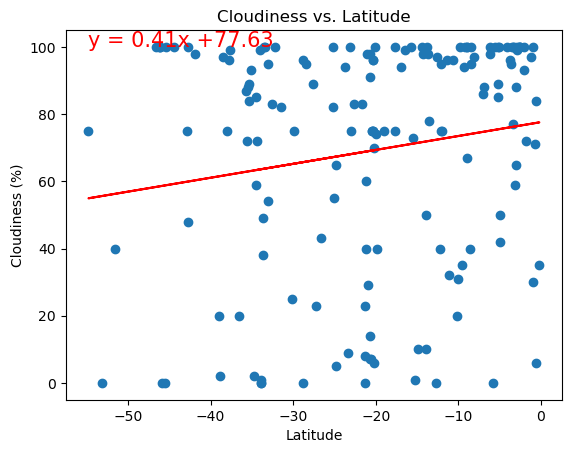

In [27]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude')

# Southern Hemisphere
regress_plot(southern_hemi_df['Lat'] , southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** The r-squared values and trendline, like the above humidty example lead one to believe that there is a correlation between cloud cover and humidty. I would shy from that assumption given the loose nature of these plots.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x +3.46
The r-value is: 0.006574720177972137


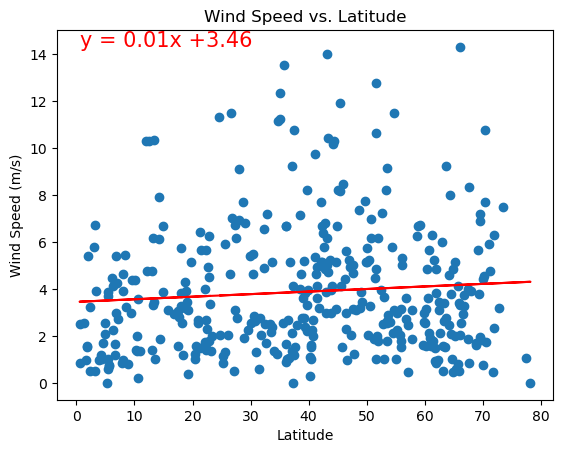

In [28]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. Latitude')

# Northern Hemisphere
regress_plot(northern_hemi_df['Lat'] , northern_hemi_df['Wind Speed'])

y = -0.05x +1.72
The r-value is: 0.10613553898604128


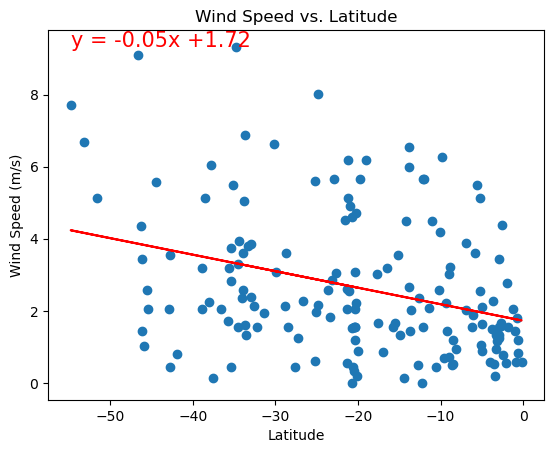

In [29]:
# Figure attributes
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs. Latitude')

# Southern Hemisphere
regress_plot(southern_hemi_df['Lat'] , southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** Wer see wind slowing the closer we get to the equator. They increase in speed the closer we ge to the poles.